In [7]:
#!pip install japanize_matplotlib
#!pip -V

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


pip 23.2.1 from C:\ProgramData\Anaconda3\lib\site-packages\pip (python 3.9)



In [8]:
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt

In [9]:
data_dir = "..\data"
input_dir = f"{data_dir}\input"
output_dir = f"{data_dir}\output"
input_file = f"{output_dir}\order_processed.csv"

In [11]:
df = pd.read_csv(input_file)
display(df.head())

,オーダーID,オーダー日,顧客ID,商品ID,数量,売上,出荷日,キャンセル日,ステータス,氏名,ひらがな,生年月日,性別,都道府県,商品名,カテゴリ,サブカテゴリ,色,サイズ,定価
0,201901010005-1,2019-01-01,C00002159,TB-BUNN,1,9800,2019-01-01,NaN,配達済み,竹田 朋実,たけだ ともみ,1995-07-01,女,東京都,トートバッグ B,バッグ,Unisex,NaN,NaN,9800
1,201901010001-1,2019-01-01,C00000112,TO-AUNN,1,2280,2019-01-04,NaN,配達済み,小川 幸枝,おがわ ゆきえ,1991-06-13,女,神奈川県,タオル A,小物,Unisex,NaN,NaN,2280
2,201901010005-2,2019-01-01,C00002159,PA-BMBS,1,20000,2019-01-02,NaN,配達済み,竹田 朋実,たけだ ともみ,1995-07-01,女,東京都,Men Black パンツ B S,ボトムス,Men,Black,S,20000
3,201901010004-1,2019-01-01,C00001710,BP-BUNN,1,9800,2019-01-01,NaN,配達済み,植田 陽一,うえだ よういち,1995-06-23,男,東京都,バックパック B,バッグ,Unisex,NaN,NaN,9800
4,201901020019-2,2019-01-02,C00001925,PA-AMBL,1,16500,2019-01-07,NaN,配達済み,原田 由香,はらだ ゆか,1975-10-12,女,大阪府,Men Black パンツ A L,ボトムス,Men,Black,L,16500


In [12]:
display(df.describe())

,数量,売上,定価
count,13670.000000,13670.000000,13670.000000
mean,1.283175,16747.298464,13083.970739
std,0.679370,13668.663074,7340.663527
min,1.000000,980.000000,980.000000
25%,1.000000,7900.000000,7600.000000
50%,1.000000,14500.000000,14300.000000
75%,1.000000,19800.000000,18100.000000
max,4.000000,164800.000000,41200.000000


(array([8.551e+03, 3.830e+03, 8.430e+02, 2.840e+02, 1.230e+02, 1.900e+01,
        1.000e+00, 1.400e+01, 0.000e+00, 5.000e+00]),
 array([   980.,  17362.,  33744.,  50126.,  66508.,  82890.,  99272.,
        115654., 132036., 148418., 164800.]),
 <BarContainer object of 10 artists>)

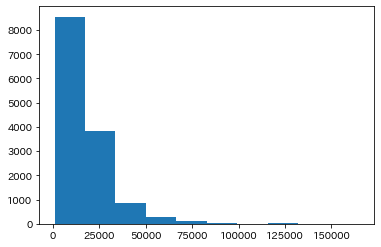

In [13]:
plt.hist(df["売上"])

(array([11196.,     0.,     0.,  1447.,     0.,     0.,   657.,     0.,
            0.,   370.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

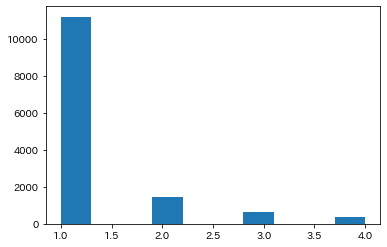

In [14]:
plt.hist(df["数量"])

## 様々な切り口でデータを可視化する

,カテゴリ,売上
0,アウター,1318
1,トップス,4159
2,バッグ,2050
3,ボトムス,4029
4,小物,2114


<BarContainer object of 5 artists>

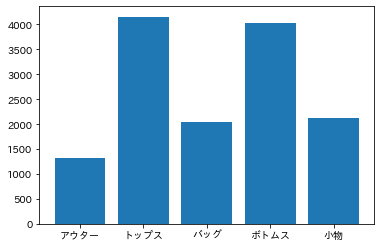

In [21]:
df_viz = df[["カテゴリ","売上"]]
df_viz = df_viz.groupby("カテゴリ",as_index=False).count()
display(df_viz)
plt.bar(df_viz["カテゴリ"],df_viz["売上"])

カテゴリ,アウター,トップス,バッグ,ボトムス,小物
性別,,,,,
女,27870000,45509300,15707260,59704800,5303940
男,14351600,21436900,7542270,29122800,2386700


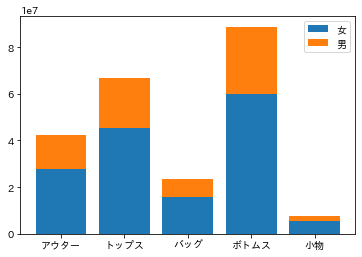

In [27]:
df_viz = df[["カテゴリ","性別","売上"]]
df_viz= df_viz.groupby(["カテゴリ","性別"],as_index=False).sum()
df_viz = df_viz.pivot(index="性別",columns="カテゴリ",values="売上")
display(df_viz)
for i in range(len(df_viz)):
    plt.bar(df_viz.columns,df_viz.iloc[i],bottom=df_viz.iloc[0:i].sum())
plt.legend(df_viz.index)
plt.savefig(f"{output_dir}\カテゴリ_性別ごとの売上.png")

<Figure size 432x288 with 0 Axes>